In [1]:
import numpy as np
import scipy.io as sio
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

RESULT_LOCATION= "/home/adwaye/matlab_projects/test_CT/Figures"
PARAM_NAMES = ["L2_mean_grad","L2_bound_grad","L2_mean_pix","L2_bound_pix","noise","ndtct","agls","grdsz","alpha",
               "grad_quantile","pix_quantile"]


def extract_params_from_name(file_name):
    # expt_name = "curated_pe_xslice_225_BUQO_problem_result"
    # file_name = "curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.1_L2_bound_grad_0.8308_L2_mean_pix_0" \
    #             ".17773_L2_bound_pix_0.0001_noise_900_ndtct_900_agls_0.35282_grdsz.mat"
    """
    
    :param expt_name: 
    :param file_name: 
    :return: 
    """
    # param_names = ["L2_mean_grad","L2_bound_grad","L2_mean_pix","L2_bound_pix","noise","ndtct","agls","grdsz"]
    out_dict   = {}
    for name in PARAM_NAMES:
        ind = file_name.find(name)
        val = file_name[0:ind].split('_')[-2]
        print(name+"="+val)
        out_dict[name] = val
    return out_dict

In [29]:
# grad_norm_name = "L2"
# M_norm_name    = "L2"
# inpainting = False
# use_dil_mask= True
# use_full_size = False

# grad_scheme_name = ""

# folder_name = ""
# if grad_scheme_name != "":
#     folder_name = '_'.join(["ct1_experiment",grad_norm_name,"gradM",grad_scheme_name,M_norm_name,"M"])
# else:
#     folder_name = '_'.join(["ct1_experiment",grad_norm_name,"gradM",M_norm_name,"M"])

# if use_full_size:
#     folder_name = '_'.join(['full_size',folder_name])

# if use_dil_mask:
#     folder_name = '_'.join([folder_name,'dil_mask'])
folder_name = "experiments_pnas"
print(folder_name)
root_folder = os.path.join("/home/adwaye/matlab_projects/test_CT/Figures",folder_name)


buqo_res_files = [os.path.join(root_folder,f) for f in os.listdir(root_folder) if f.split('.')[-1]=="mat" and "BUQO_problem_results" in f]


df = pd.DataFrame()
k = 0
rho_array = []
hpd_array = []
#boolean array that check for convergence of BUQO
M_conv_array = [] #bool if bound on M was satisfied
g_conv_array = [] #bool if bound on grad was satisfied
y_conv_array = [] #bool if bound on data fit y was satisfied
w_conv_array = [] #bool if bound on wave reg was satisfied

for fname in buqo_res_files:
    fpath = fname
    print("------------------------------------------------------")
    print(fname.split('/')[-1])
    out_dict = extract_params_from_name(fname)
    df2 = pd.DataFrame()
    
    for keys, val in out_dict.items():
        if k == 0:
            df[keys] = np.array([val],dtype=str)
            
        else:
            df2[keys] = np.array([val],dtype=str)
    splits = fpath.split('/')[-1].split('_')
    ct_slice = splits[2]+'_'+splits[3]
    if k ==0:
        df['file_name'] = fpath#os.path.split(fname,'/')[-1]
        
        df['ct_slice']  = ct_slice
    else:
        df2['file_name'] = fpath#os.path.split(fname,'/')[-1]
        df2['ct_slice']  = ct_slice
        df = df.append(df2)
    k+=1
    matfile = sio.loadmat(fpath)
    rho_array +=[matfile['rho'].ravel()[0]]
    hpd_array += [matfile['hpd_constraint'].ravel()[0]]
    M_conv_array += [ matfile['l2smooth'].ravel()[-1]< matfile['l2_bound_pix'].ravel()[0] ] 
    g_conv_array += [ matfile['smooth_max'].ravel()[-1]< matfile['l2_bound_grad'].ravel()[0] ] 
    y_conv_array += [ matfile['l2data'].ravel()[-1]< matfile['epsilon'].ravel()[0] ] 
    w_conv_array += [ matfile['l1reg'].ravel()[-1]< matfile['hpd_constraint'].ravel()[0] ] 
df['rho']  = np.array(rho_array)
df['hpd_constraint'] = hpd_array

df['agls'] = pd.to_numeric(df['agls'])
df['grad_quantile'] = pd.to_numeric(df['grad_quantile'])
df['rho'] = pd.to_numeric(df['rho'])
df['M_conv'] = M_conv_array
df['grad_conv'] = g_conv_array
df['data_conv'] = y_conv_array
df['hpd_conv']  = w_conv_array
df['BUQO_conv'] = np.array(M_conv_array)*np.array(g_conv_array)*np.array(y_conv_array)*np.array(w_conv_array)
df.index = np.arange(0,df.shape[0])

experiments_pnas
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.0063107_L2_bound_grad_0.6_grad_quantile_0.8063_L2_mean_pix_0.0080086_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.001_noise_450_ndtct_100_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0063107
L2_mean_pix=0.8063
L2_bound_pix=0.0080086
noise=0.001
ndtct=450
agls=100
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.01129_L2_bound_grad_0.7_grad_quantile_0.80991_L2_mean_pix_0.018272_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.0003_noise_450_ndtct_200_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.01129
L2_mean_pix=0.80991
L2_bound_pix=0.018272
noise=0.0003
ndtct=450
agls=200
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0097781_L2_bound_grad_0.6_grad_quantile_0.83692_L2_mean_pix_0.0068086_L2_bound_pix_0.6_pix_quantile_0.01_alpha_5e-05_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0097781
L2_mean_pix=0.83692
L2_bound_pix=0.0068086
noise=5e-05
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.019979_L2_bound_grad_0.7_grad_quantile_0.80624_L2_mean_pix_0.026769_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.001_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.019979
L2_mean_pix=0.80624
L2_bound_pix=0.026769
noise=0.001
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_me

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.015775_L2_bound_grad_0.7_grad_quantile_0.83725_L2_mean_pix_0.015351_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.0002_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.015775
L2_mean_pix=0.83725
L2_bound_pix=0.015351
noise=0.0002
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.001_L2_bound_grad_0.82857_L2_mean_pix_0.12413_L2_bound_pix_0.0005_noise_350_ndtct_400_agls_0.70711_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.001
L2_mean_pix=0.82857
L2_bound_pix=0.12413
noise=0.0005
ndtct=350
agls=400
grdsz=0.70711
alpha=0.70711
grad_quantile=0.70711
pix_quantile=0.70711
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.0058303_L2_bound_grad_0.6_grad_qu

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0077625_L2_bound_grad_0.6_grad_quantile_0.8365_L2_mean_pix_0.0058301_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.0003_noise_450_ndtct_100_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0077625
L2_mean_pix=0.8365
L2_bound_pix=0.0058301
noise=0.0003
ndtct=450
agls=100
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.01_L2_bound_grad_0.8308_L2_mean_pix_0.064509_L2_bound_pix_0.0005_noise_500_ndtct_400_agls_1.34_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.01
L2_mean_pix=0.8308
L2_bound_pix=0.064509
noise=0.0005
ndtct=500
agls=400
grdsz=1.34
alpha=1.34
grad_quantile=1.34
pix_quantile=1.34
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.005_L2_bound_grad_0.8308_L2_mean_pix_0.0061284_L

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0005_L2_bound_grad_0.8308_L2_mean_pix_0.056629_L2_bound_pix_0.0005_noise_500_ndtct_400_agls_1.34_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0005
L2_mean_pix=0.8308
L2_bound_pix=0.056629
noise=0.0005
ndtct=500
agls=400
grdsz=1.34
alpha=1.34
grad_quantile=1.34
pix_quantile=1.34
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0084117_L2_bound_grad_0.6_grad_quantile_0.83583_L2_mean_pix_0.0071895_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.0002_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0084117
L2_mean_pix=0.83583
L2_bound_pix=0.0071895
noise=0.0002
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.011491_L2_bound_grad_0.8308_L2_mean_pix_0.

------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.032503_L2_bound_grad_0.9_grad_quantile_0.80835_L2_mean_pix_0.037618_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.0002_noise_450_ndtct_200_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.032503
L2_mean_pix=0.80835
L2_bound_pix=0.037618
noise=0.0002
ndtct=450
agls=200
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.017287_L2_bound_grad_0.7_grad_quantile_0.79194_L2_mean_pix_0.021615_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.001_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.017287
L2_mean_pix=0.79194
L2_bound_pix=0.021615
noise=0.001
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean

In [25]:
df['']

array([False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True, False, False,  True, False, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True,

<h1>Rho vs M</h1>

In [30]:
df1 = df.copy()
columns = ['ndtct','noise','rho','agls','grad_quantile','pix_quantile','alpha']
for col in columns:
    df1[col]=pd.to_numeric(df1[col])

bool_loc = df1['ndtct']== 450

indexes = np.where(bool_loc)
print(indexes)

df1 = df1.loc[indexes[0].tolist()].copy()
df1 = df1.sort_values(by='agls')
df2 = df1.copy()
df2 = df2.groupby('grad_quantile').get_group(0.9)



(array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  11,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  25,  27,  28,  29,  30,
        31,  34,  35,  37,  38,  41,  43,  44,  45,  46,  47,  48,  51,
        53,  55,  56,  57,  58,  59,  61,  62,  63,  64,  67,  68,  69,
        71,  74,  75,  76,  77,  78,  79,  80,  83,  84,  85,  88,  89,
        90,  91,  92,  94,  96,  98, 100, 101, 103, 105, 106, 108, 109,
       110, 111, 113, 115, 118, 119, 120, 121, 122, 123, 126, 127, 128,
       130, 132, 134, 136, 138]),)


48

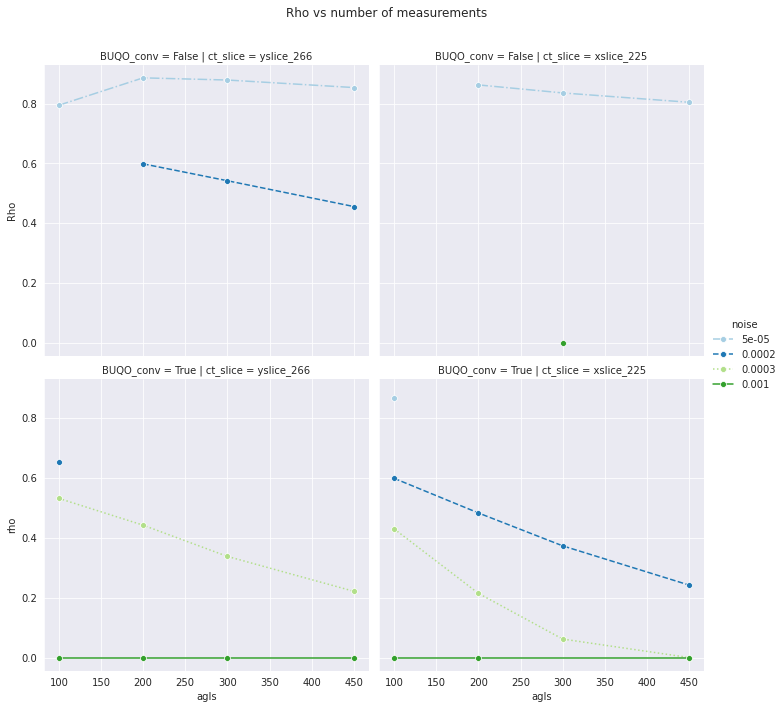

In [31]:
marker = ['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V']
# d = {'color': ['C0', 'k'], "ls" : ["-","--"]}
# d = { "markers" : ['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V']}
d = { "ls" : [ 'dashdot', 'dashed', 'dotted', 'solid']}
markers = [marker[i] for i in range(len(df2["noise"].unique()))]
sns.set_style('darkgrid')
grid = sns.FacetGrid(df2,col="ct_slice",hue="noise",hue_kws=d,row='BUQO_conv',
                         height=5,legend_out=True,palette=sns.color_palette("Paired"))
g = grid.map(sns.lineplot,"agls","rho",marker='o')
g.add_legend()
grid.axes[0,0].set_xlabel("Number of angles")
# grid.axes[0,0].set_title("x slice 225")
grid.axes[0,0].set_ylabel("Rho")
grid.axes[0,1].set_xlabel("Number of angles")
# grid.axes[0,1].set_title("y slice 225")


g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Rho vs number of measurements')
output_folder = "/home/adwaye/Documents/abstracts and papers/PNAS/figures"
g.fig.savefig(os.path.join(output_folder,"rho_vs_m.pdf"))

<h1>Effect of $M$ on $\rho$ </h1>


Int64Index([0, 1, 2, 3], dtype='int64')


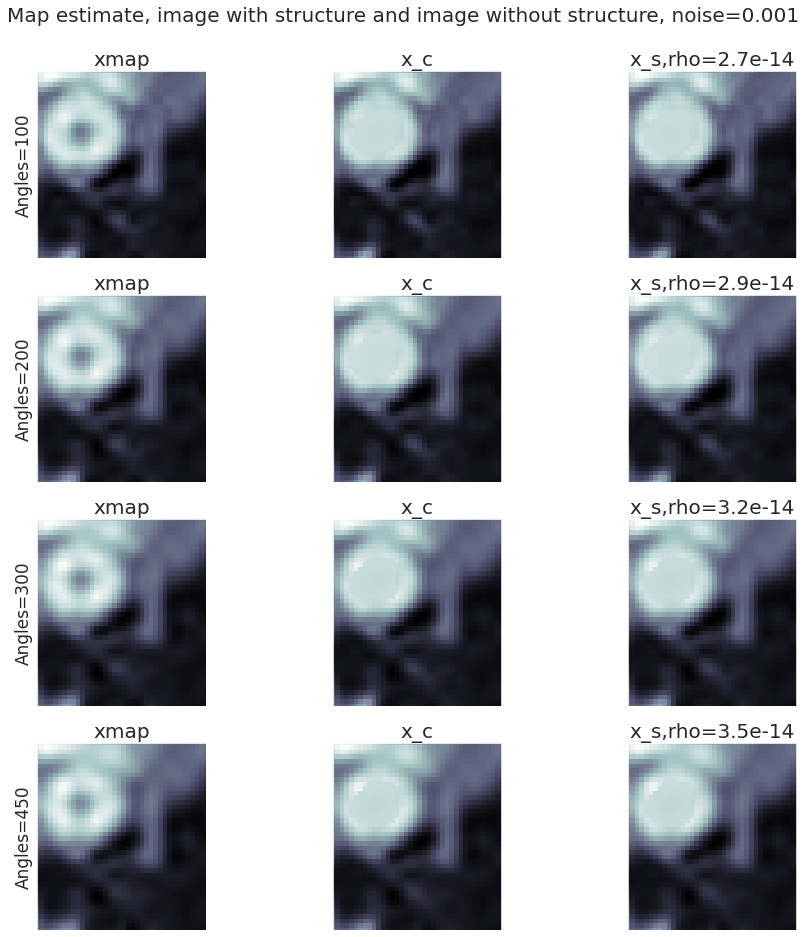

In [6]:

font_size = 20
df1.index = np.arange(0,df1.shape[0])
alpha = 0.01
grad_quantile = 0.9
pix_quantile  = 0.9
noise         = 0.001
ct_slice = 'xslice_225'#'xslice_225', 'yslice_266'


bool_loc = np.logical_and.reduce((df1['grad_quantile'] == grad_quantile ,
                                  df1['noise']== noise, 
                                  df1['alpha']==alpha,
                                  df1['ct_slice']==ct_slice))
indexes = np.where(bool_loc)



indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])



k=0
df_copy = df1.loc[indexes[0].tolist()].copy()
df_copy = df_copy.sort_values(by='agls')
df_copy.index = np.arange(0,df_copy.shape[0])
fig, ax = plt.subplots(nrows=df_copy.shape[0],ncols=3,figsize=(15,15))
print(df_copy.index)
k = 0



mask_struct = sio.loadmat(os.path.join(root_folder,buqo_res_files[0]))['struct_mask']
row_mask,col_mask = np.where(mask_struct>0)
max_x = np.max(row_mask)
min_x = np.min(row_mask)
max_y = np.max(col_mask)
min_y = np.min(col_mask)
upper_x = max_y+15;
lower_x =  min_y-15;
upper_y = max_x+15;
lower_y = min_x-15;

for n_angles in df_copy['agls']:
    index = np.where(df_copy['agls']==n_angles)
    file_name = df_copy['file_name'].loc[index].ravel()[0]
    rho       = df_copy['rho'].loc[index].ravel()[0]
    matfile  = sio.loadmat(os.path.join(root_folder,file_name))
    ax[k,0].imshow(matfile['xmap'],cmap="bone")
#     ax[k,0].set_title('xmap, noise={:}'.format(noise),fontsize=16)
    ax[k,0].set_title('xmap',fontsize=font_size)
    ax[k,0].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,0].set_xticks([])
    ax[k,0].set_yticks([])
#     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
    ax[k,0].set_ylabel('Angles={:}'.format(n_angles),fontsize=font_size-3)
    
    
    ax[k,1].imshow(matfile['x_c'],cmap="bone")
    ax[k,1].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,1].set_title('x_c',fontsize=font_size)
    ax[k,1].set_xticks([])
    ax[k,1].set_yticks([])
    
    ax[k,2].imshow(matfile['x_s'],cmap="bone")
    ax[k,2].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,2].set_title('x_s,rho={:.2}'.format(rho),fontsize=font_size)
    ax[k,2].set_xticks([])
    ax[k,2].set_yticks([])
    
    k+=1
fig.subplots_adjust(top=0.92)
fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    


fig.savefig(os.path.join(output_folder,ct_slice+".pdf"),bbox_inches='tight')
    
# plt.figure()
# sns.lineplot(data=df_copy,x='agls',y='rho')
# plt.show()

In [49]:
np.where(np.logical_and.reduce((df1['grad_quantile'] == grad_quantile ,
                                  df1['noise']== noise, 
#                                   df1['alpha']==0.01
                               )
                              )
        )

(array([ 5, 12, 31, 46]),)

<h1>Effect of noise on $\rho$</h1>

Int64Index([], dtype='int64')


<Figure size 1080x1080 with 0 Axes>

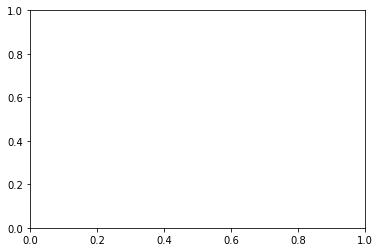

In [28]:


df1.index = np.arange(0,df1.shape[0])
alpha = 0.01
grad_quantile = 0.6
pix_quantile  = 0.8
agls         = 900




bool_loc = np.logical_and.reduce((df1['grad_quantile'] == grad_quantile ,
                                  df1['alpha']== alpha, 
                                  df1['agls']==agls))
indexes = np.where(bool_loc)



indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])



k=0
df_copy = df1.loc[indexes[0].tolist()].copy()
df_copy = df_copy.sort_values(by='noise')
df_copy.index = np.arange(0,df_copy.shape[0])
fig, ax = plt.subplots(nrows=df_copy.shape[0],ncols=3,figsize=(15,15))
print(df_copy.index)
k = 0



mask_struct = sio.loadmat(os.path.join(root_folder,buqo_res_files[0]))['struct_mask']
row_mask,col_mask = np.where(mask_struct>0)
max_x = np.max(row_mask)
min_x = np.min(row_mask)
max_y = np.max(col_mask)
min_y = np.min(col_mask)
upper_x = max_y+15;
lower_x =  min_y-15;
upper_y = max_x+15;
lower_y = min_x-15;

for noise in df_copy['noise']:
    print(noise)
    index = np.where(df_copy['noise']==noise)
    file_name = df_copy['file_name'].loc[index].ravel()[0]
    rho       = df_copy['rho'].loc[index].ravel()[0]
    matfile  = sio.loadmat(os.path.join(root_folder,file_name))
    ax[k,0].imshow(matfile['xmap'],cmap="bone")
    ax[k,0].set_title('xmap, rho={:}'.format(rho))
    ax[k,0].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,0].set_xticks([])
    ax[k,0].set_yticks([])
    ax[k,0].set(ylabel='noise={:}'.format(noise))
    
    
    ax[k,1].imshow(matfile['x_c'],cmap="bone")
    ax[k,1].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,1].set_title('x_c')
    ax[k,1].set_xticks([])
    ax[k,1].set_yticks([])
    
    ax[k,2].imshow(matfile['x_s'],cmap="bone")
    ax[k,2].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,2].set_title('x_s')
    ax[k,2].set_xticks([])
    ax[k,2].set_yticks([])
    fig.suptitle('grad_radius={:},pix_radius={:}'.format(grad_quantile,pix_quantile)+', angles={:},alpha={:}'.format(agls,alpha))
    k+=1

    
plt.figure()
sns.lineplot(data=df_copy,x='noise',y='rho',marker='o')
plt.show()

np.unique(df1.noise)

Int64Index([0, 1, 2, 3], dtype='int64')
(array([0]),)
0.30072576893986985
(array([1]),)
0.30072576633051884
(array([2]),)
0.30072576633051884
(array([3]),)
0.30072576633051884


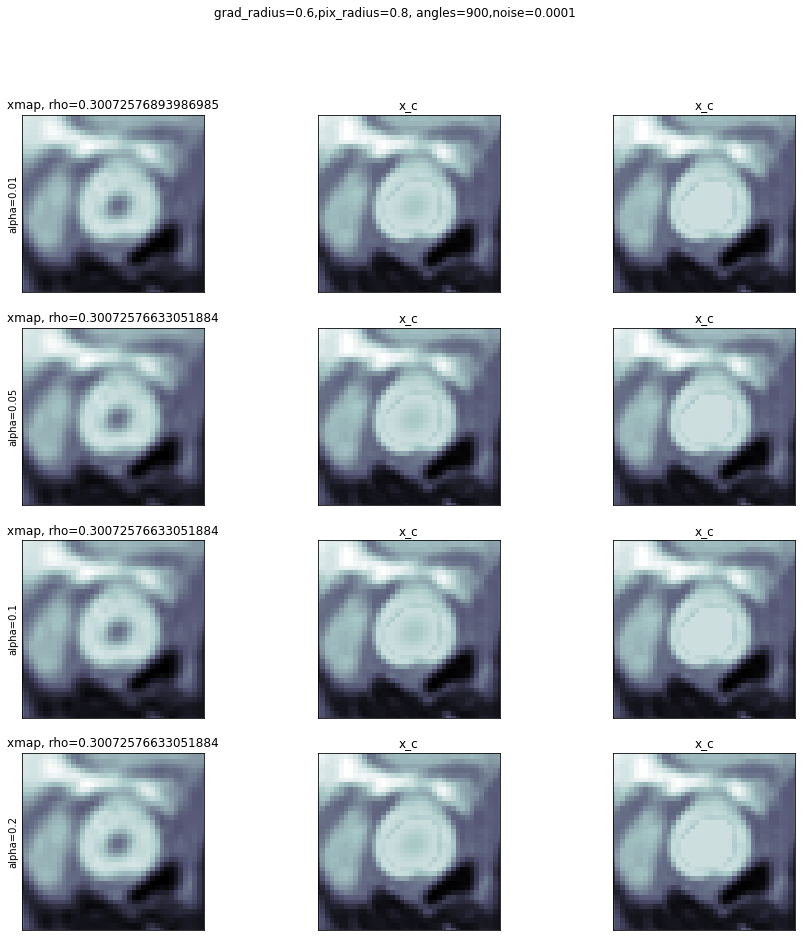

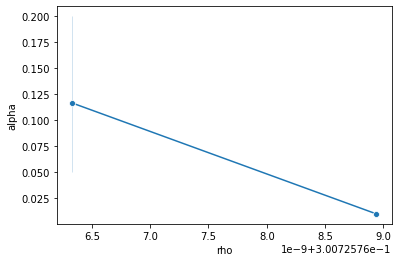

In [184]:


df1.index = np.arange(0,df1.shape[0])

grad_quantile = 0.6
pix_quantile  = 0.8
agls         = 900
noise = 0.0001



bool_loc = np.logical_and.reduce((df1['grad_quantile'] == grad_quantile ,
                                  df1['noise']== noise, 
                                  df1['agls']==agls))
indexes = np.where(bool_loc)



indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])



k=0
df_copy = df1.loc[indexes[0].tolist()].copy()
df_copy = df_copy.sort_values(by='alpha')
df_copy.index = np.arange(0,df_copy.shape[0])
fig, ax = plt.subplots(nrows=df_copy.shape[0],ncols=3,figsize=(15,15))
print(df_copy.index)
k = 0



mask_struct = sio.loadmat(os.path.join(root_folder,buqo_res_files[0]))['struct_mask']
row_mask,col_mask = np.where(mask_struct>0)
max_x = np.max(row_mask)
min_x = np.min(row_mask)
max_y = np.max(col_mask)
min_y = np.min(col_mask)
upper_x = max_y+15;
lower_x =  min_y-15;
upper_y = max_x+15;
lower_y = min_x-15;

for alpha in df_copy['alpha']:
    
    index = np.where(df_copy['alpha']==alpha)
    print(index)
    file_name = df_copy['file_name'].loc[index].ravel()[0]
    rho       = df_copy['rho'].loc[index].ravel()[0]
    print(rho)
    matfile  = sio.loadmat(os.path.join(root_folder,file_name))
    ax[k,0].imshow(matfile['xmap'],cmap="bone")
    ax[k,0].set_title('xmap, rho={:}'.format(rho))
    ax[k,0].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,0].set_xticks([])
    ax[k,0].set_yticks([])
    ax[k,0].set(ylabel='alpha={:}'.format(alpha))
    
    
    ax[k,1].imshow(matfile['x_c'],cmap="bone")
    ax[k,1].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,1].set_title('x_c')
    ax[k,1].set_xticks([])
    ax[k,1].set_yticks([])
    
    ax[k,2].imshow(matfile['x_s'],cmap="bone")
    ax[k,2].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,2].set_title('x_c')
    ax[k,2].set_xticks([])
    ax[k,2].set_yticks([])
    fig.suptitle('grad_radius={:},pix_radius={:}'.format(grad_quantile,pix_quantile)+', angles={:},noise={:}'.format(agls,noise))
    k+=1

    
plt.figure()
sns.lineplot(data=df_copy,x='rho',y='alpha',marker='o')
plt.show()

In [171]:
df_copy['rho']

0    0.300726
1    0.300726
2    0.300726
3    0.300726
Name: rho, dtype: float64

In [57]:
import nrrd
import scipy.io as sio
folder = "/home/adwaye/matlab_projects/test_CT/Data/ct_scans/ct1"

ct_name = "DE_CTPA_1_5_Bv38_2_F_0.mat"
label_name = "pe_DE_CTPA_1_5_Bv38_2_F_0.mat"
ct_matfile = sio.loadmat(os.path.join(folder,ct_name))
label_matfile = sio.loadmat(os.path.join(folder,label_name))
ct = ct_matfile['array']
label = label_matfile['array']

True

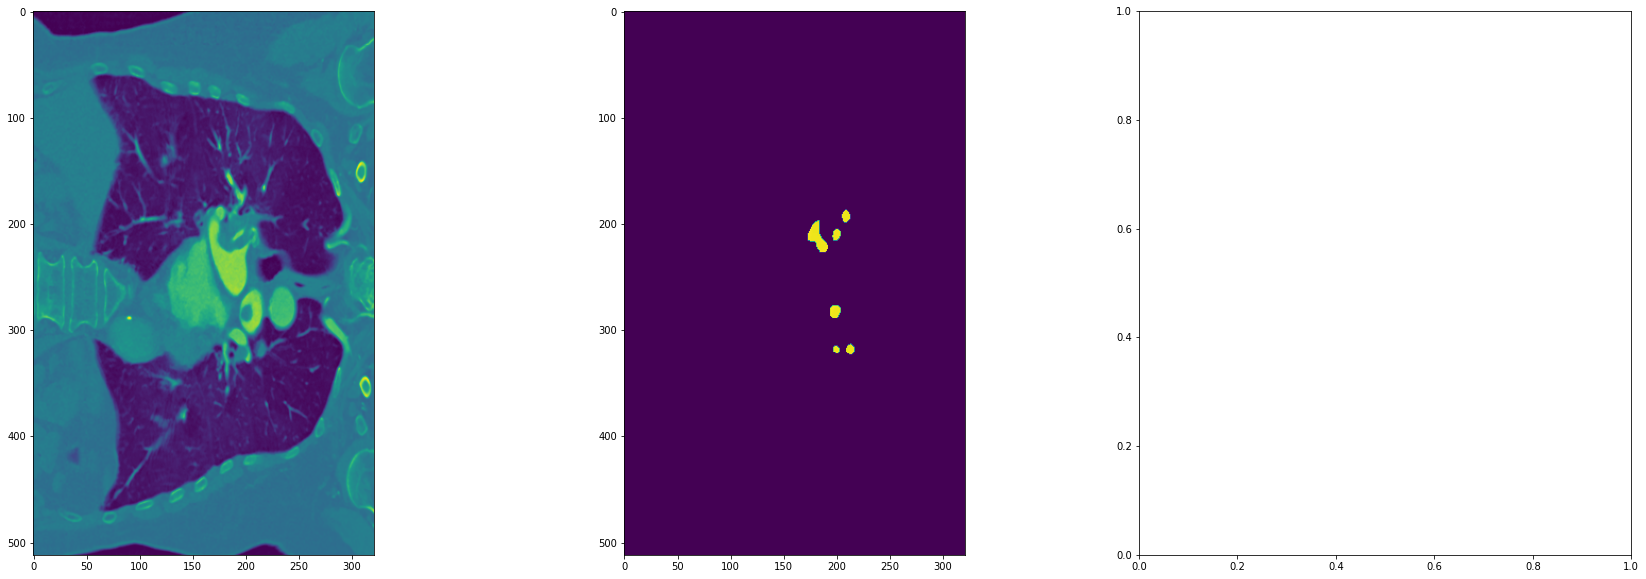

In [99]:
import cv2
target_folder = "/home/adwaye/matlab_projects/test_CT/DataAspax_annot/"
slice_index = 266
fig,ax = plt.subplots(ncols=3,figsize=(30,10))
ax[0].imshow(ct[:,slice_index,:])
ax[1].imshow(label[:,slice_index,:])
im = ct[:,slice_index,:]
ct_scaled = im - np.min(im)
ct_scaled = ct_scaled/(np.max(im)-np.min(im))
ct_scaled *= 255
cv2.imwrite(os.path.join(target_folder,"pe_yslice_"+str(slice_index)+".png"),ct_scaled)

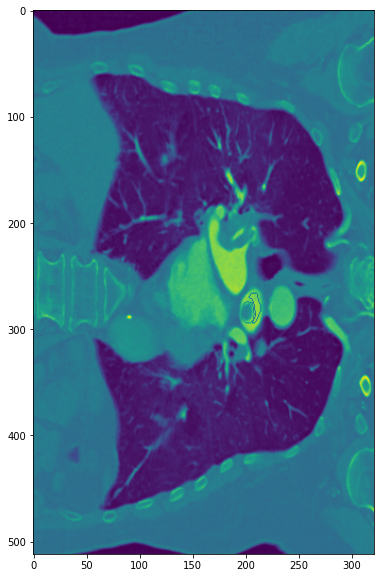

In [111]:


im_copy = im.copy()
label_mask = np.zeros(ct_scaled.shape)
outline_name = "/home/adwaye/matlab_projects/test_CT/DataAspax_annot/ct1/bone/266/heart_R_PHANTOM.txt"
outline  = np.loadtxt(outline_name)
contours = outline.astype(np.int)
cv2.fillPoly(label_mask, pts = [contours], color =(255,255,255))
cv2.polylines(im_copy, [contours], True,color =(220,0,0))


texture_mask = np.zeros(ct_scaled.shape)
outline_name = "/home/adwaye/matlab_projects/test_CT/DataAspax_annot/ct1/bone/266/heart_R_area1.txt"
outline  = np.loadtxt(outline_name)
contours = outline.astype(np.int)
cv2.fillPoly(texture_mask, pts = [contours], color =(255,255,255))
cv2.polylines(im_copy,[contours], True,color =(0,0,220))



my_dict = {}
my_dict['CT'] = im
my_dict['labels'] = label_mask
plt.figure(figsize=(20,10))
plt.imshow(im_copy)

In [115]:
sio.savemat(file_name="/home/adwaye/matlab_projects/test_CT/Data/ct_scans/ct1/curated2_pe_yslice_"+str(slice_index)+".mat",mdict={'CT':im,
                                                                                                   'labels':label_mask,
                                                                                                    'texture_mask': texture_mask
                                                                                                    })

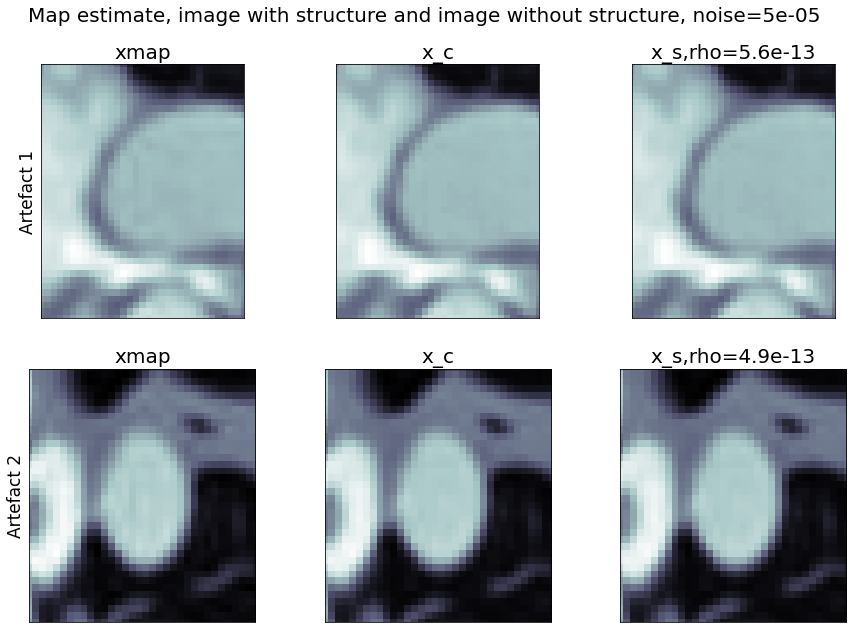

In [11]:
source_folder = "/home/adwaye/matlab_projects/test_CT/Figures/artefact_experiment_L2_gradM_L2_M"
font_size = 20
df1.index = np.arange(0,df1.shape[0])
alpha = 0.01
grad_quantile = 0.6
pix_quantile  = 0.6
noise         = 0.00005
ct_slice = 'xslice_225'#'xslice_225', 'yslice_266'


artefact2 = "curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.012085_L2_bound_grad_0.9_grad_quantile_0.6844_L2_mean_pix_0.013819_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.0002_noise_450_ndtct_200_agls_0.70564_grdsz.mat"
artefact1 = "curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.005985_L2_bound_grad_0.9_grad_quantile_0.70594_L2_mean_pix_0.016424_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.0002_noise_450_ndtct_200_agls_0.70564_grdsz.mat"





indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])


fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
k =0
for fname in [artefact1,artefact2]:
    matfile = sio.loadmat(os.path.join(source_folder,fname))
    mask_struct = matfile['struct_mask']
    row_mask,col_mask = np.where(mask_struct>0)
    max_x = np.max(row_mask)
    min_x = np.min(row_mask)
    max_y = np.max(col_mask)
    min_y = np.min(col_mask)
    upper_x = max_y+15;
    lower_x =  min_y-15;
    upper_y = max_x+15;
    lower_y = min_x-15;


    rho       = matfile['rho'].ravel()[0]
    
    ax[k,0].imshow(matfile['xmap'],cmap="bone")
#     ax[k,0].set_title('xmap, noise={:}'.format(noise),fontsize=16)
    ax[k,0].set_title('xmap',fontsize=font_size)
    ax[k,0].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,0].set_xticks([])
    ax[k,0].set_yticks([])
#     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
    ax[k,0].set_ylabel('Artefact {:}'.format(k+1),fontsize=font_size-3)
    ax[k,1].imshow(matfile['x_c'],cmap="bone")
    ax[k,1].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,1].set_title('x_c',fontsize=font_size)
    ax[k,1].set_xticks([])
    ax[k,1].set_yticks([])
    
    ax[k,2].imshow(matfile['x_s'],cmap="bone")
    ax[k,2].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,2].set_title('x_s,rho={:.2}'.format(rho),fontsize=font_size)
    ax[k,2].set_xticks([])
    ax[k,2].set_yticks([])
    
    k+=1
fig.subplots_adjust(top=0.9)
fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    
output_folder = "/home/adwaye/Documents/abstracts and papers/PNAS/figures"

fig.savefig(os.path.join(output_folder,"aretfacts.pdf"),bbox_inches='tight')
    
# plt.figure()
# sns.lineplot(data=df_copy,x='agls',y='rho')
# plt.show()

In [6]:
rho

array([5.57886205e-13])